In [2]:
# Import pandas, numpy and matplotlib, sklearn KNN packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
%matplotlib inline

#read and store datasets into pandas dataframes
dfDigits = pd.read_csv('df_digits.csv')
dfWine = pd.read_csv('df_wine.csv')

dfDigits = dfDigits.reset_index(drop=True)
dfWine = dfWine.reset_index(drop=True)


#Split the dataframes into 5 groups, store into different data frames


#Find the amount of rows we will group together for 5-fold validation

rowsGroupedForValDigits = dfDigits.shape[0] / 5 
rowsGroupedForValWine = dfWine.shape[0] / 5

print(f'Row Group amount for Digit Dataframe: {rowsGroupedForValDigits}\nRow Group amount for Wine Dataframe: {rowsGroupedForValWine}')


Row Group amount for Digit Dataframe: 359.4
Row Group amount for Wine Dataframe: 979.6


In [3]:
#Digit splits by ~359 rows a set
xDigits1 = dfDigits.iloc[0:359, 1:65]
yDigits1 = dfDigits.iloc[0:359, 65]

xDigits2 = dfDigits.iloc[359:718, 1:65]
yDigits2 = dfDigits.iloc[359:718, 65]

xDigits3 = dfDigits.iloc[718:1077, 1:65]
yDigits3 = dfDigits.iloc[718:1077, 65]

xDigits4 = dfDigits.iloc[1077:1436, 1:65]
yDigits4 = dfDigits.iloc[1077:1436, 65]

xDigits5 = dfDigits.iloc[1436:, 1:65]
yDigits5 = dfDigits.iloc[1436:, 65]


#Wine splits ~979 rows a set
xWine1 = pd.DataFrame(dfWine.iloc[0:979, 1:12])
yWine1 = pd.DataFrame(dfWine.iloc[0:979, 12])


xWine2 = pd.DataFrame(dfWine.iloc[979:1958, 1:12])
yWine2 = pd.DataFrame(dfWine.iloc[979:1958, 12])

xWine3 = pd.DataFrame(dfWine.iloc[1958:2937, 1:12])
yWine3 = pd.DataFrame(dfWine.iloc[1958:2937, 12])


xWine4 = pd.DataFrame(dfWine.iloc[2937:3916, 1:12])
yWine4 = pd.DataFrame(dfWine.iloc[2937:3916, 12])


xWine5 = pd.DataFrame(dfWine.iloc[3916:, 1:12])
yWine5 = pd.DataFrame(dfWine.iloc[3916:, 12])


#Produce Digits dataframes to prep for cross validation checking
#Train 2-3-4-5, Test 1
x_dtrain1 = pd.concat([xDigits2, xDigits3, xDigits4, xDigits5])
y_dtrain1 = pd.concat([yDigits2, yDigits3, yDigits4, yDigits5])

x_dtest1 = xDigits1
y_dtest1 = yDigits1

#Train 1-3-4-5, Test 2
x_dtrain2 = pd.concat([xDigits1, xDigits3, xDigits4, xDigits5])
y_dtrain2 = pd.concat([yDigits1, yDigits3, yDigits4, yDigits5])

x_dtest2 = xDigits2
y_dtest2 = yDigits2


#Train 1-2-4-5, Test 3
x_dtrain3 = pd.concat([xDigits1, xDigits2, xDigits4, xDigits5])
y_dtrain3 = pd.concat([yDigits1, yDigits2, yDigits4, yDigits5])

x_dtest3 = xDigits3
y_dtest3 = yDigits3


#Train 1-2-3-5, Test 4
x_dtrain4 = pd.concat([xDigits1, xDigits2, xDigits3, xDigits5])
y_dtrain4 = pd.concat([yDigits1, yDigits2, yDigits3, yDigits5])

x_dtest4 = xDigits4
y_dtest4 = yDigits4

#Train 1-2-3-4, Test 5
x_dtrain5 = pd.concat([xDigits1, xDigits2, xDigits3, xDigits4])
y_dtrain5 = pd.concat([yDigits1, yDigits2, yDigits3, yDigits4])

x_dtest5 = xDigits5
y_dtest5 = yDigits5






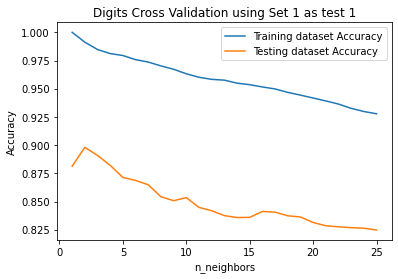

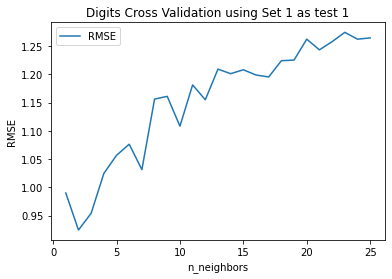

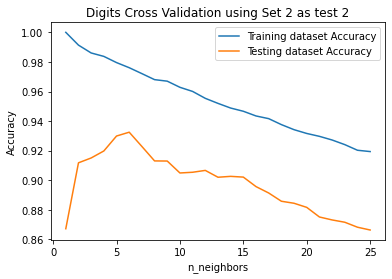

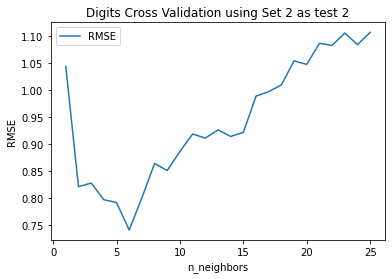

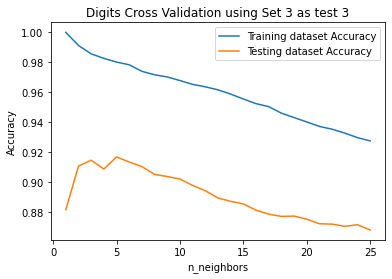

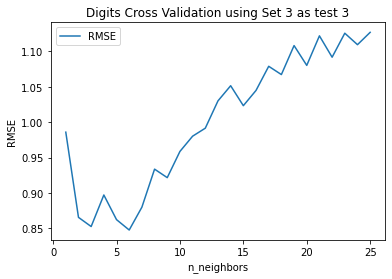

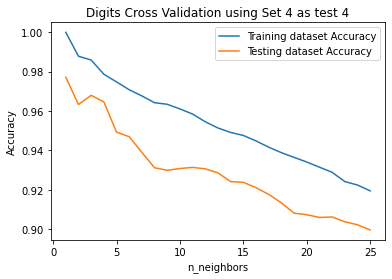

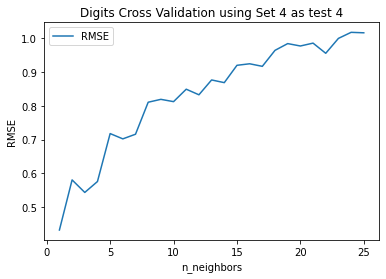

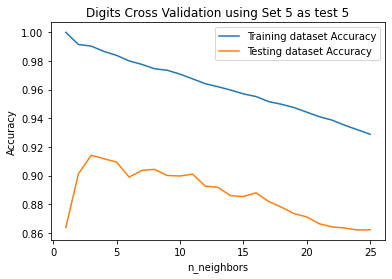

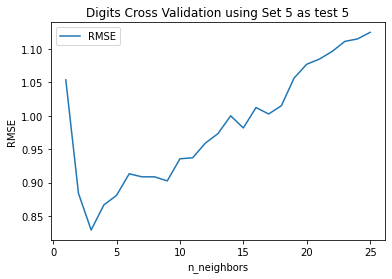

In [4]:
#Produce Digits dataframes to prep for cross validation checking
#Train 2-3-4-5, Test 1
x_dtrain1 = pd.concat([xDigits2, xDigits3, xDigits4, xDigits5])
y_dtrain1 = pd.concat([yDigits2, yDigits3, yDigits4, yDigits5])

x_dtest1 = xDigits1
y_dtest1 = yDigits1

#Train 1-3-4-5, Test 2
x_dtrain2 = pd.concat([xDigits1, xDigits3, xDigits4, xDigits5])
y_dtrain2 = pd.concat([yDigits1, yDigits3, yDigits4, yDigits5])

x_dtest2 = xDigits2
y_dtest2 = yDigits2


#Train 1-2-4-5, Test 3
x_dtrain3 = pd.concat([xDigits1, xDigits2, xDigits4, xDigits5])
y_dtrain3 = pd.concat([yDigits1, yDigits2, yDigits4, yDigits5])

x_dtest3 = xDigits3
y_dtest3 = yDigits3


#Train 1-2-3-5, Test 4
x_dtrain4 = pd.concat([xDigits1, xDigits2, xDigits3, xDigits5])
y_dtrain4 = pd.concat([yDigits1, yDigits2, yDigits3, yDigits5])

x_dtest4 = xDigits4
y_dtest4 = yDigits4

#Train 1-2-3-4, Test 5
x_dtrain5 = pd.concat([xDigits1, xDigits2, xDigits3, xDigits4])
y_dtrain5 = pd.concat([yDigits1, yDigits2, yDigits3, yDigits4])

x_dtest5 = xDigits5
y_dtest5 = yDigits5

#sanity check
#print(x_dtrain1.shape, x_dtrain2.shape ,x_dtrain3.shape ,x_dtrain4.shape,x_dtrain5.shape)
#print(y_dtrain1.head)


#Used split dataframes to train, the test respectively each time for every fold
#Five fold validation for Digit dataset first


nfolds = 5

train_accuracy = []
test_accuracy = []
RMSE = []

for a in range(0, nfolds):
    train_accuracy2 = []
    train_accuracy.append(train_accuracy2)

for b in range(0, nfolds):
    test_accuracy2 = []
    test_accuracy.append(test_accuracy2)

for c in range(0, nfolds):
    RMSE2 = []
    RMSE.append(RMSE2)
    
    
#will evaluate accuracy from 1 - 25 neighbors
neighbors = np.arange(1, 26)
for i in range(1, nfolds + 1):
    xTrainDigits = globals()[f"x_dtrain{i}"]
    xTestDigits = globals()[f"x_dtest{i}"]

    yTrainDigits = globals()[f"y_dtrain{i}"]
    yTestDigits = globals()[f"y_dtest{i}"]
    
    
    for j, k in enumerate(neighbors):
        knn = KNeighborsRegressor(n_neighbors = k, weights = 'uniform', metric = 'euclidean')
        knn.fit(xTrainDigits, yTrainDigits.values.reshape(-1))
        y_predict = knn.predict(xTestDigits).astype(int)
        
         # Compute & store training and test data accuracies.
        train_accuracy_temp = knn.score(xTrainDigits, yTrainDigits)
        train_accuracy[i-1].append(train_accuracy_temp)

        test_accuracy_temp = knn.score(xTestDigits, yTestDigits)
        test_accuracy[i-1].append(test_accuracy_temp)

        # Compute & store RMSE (root mean squared error) values.
        RMSE_temp = np.sqrt(mean_squared_error(yTestDigits, y_predict))
        RMSE[i-1].append(RMSE_temp)
        

    # Generate plots to evaluate appropriate number 'K' neighbors.
    plt.plot(neighbors, train_accuracy[i-1], label = 'Training dataset Accuracy')
    plt.plot(neighbors, test_accuracy[i-1], label = 'Testing dataset Accuracy')
    plt.legend()
    plt.title(f"Digits Cross Validation using Set {i} as test {i}")
    plt.xlabel('n_neighbors')
    plt.ylabel('Accuracy')
    plt.show()

    plt.plot(neighbors, RMSE[i-1], label = 'RMSE')
    plt.legend()
    plt.title(f"Digits Cross Validation using Set {i} as test {i}")
    plt.xlabel('n_neighbors')
    plt.ylabel('RMSE')
    plt.show()
        


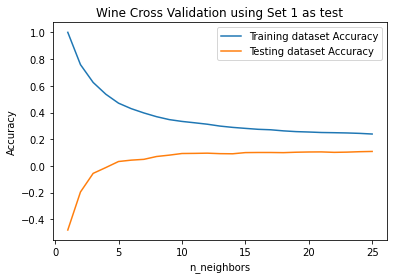

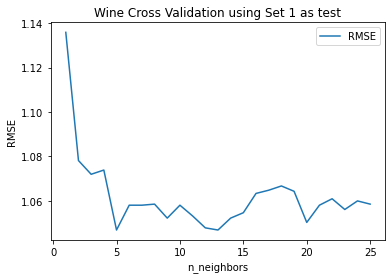

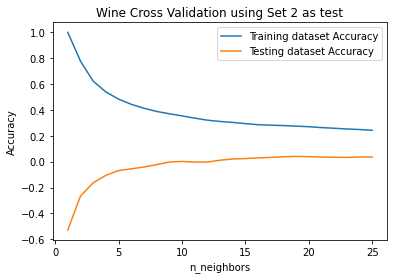

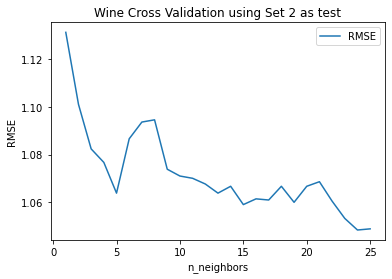

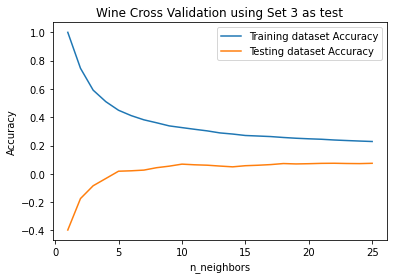

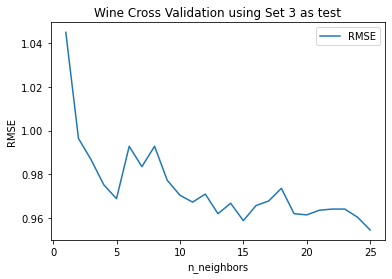

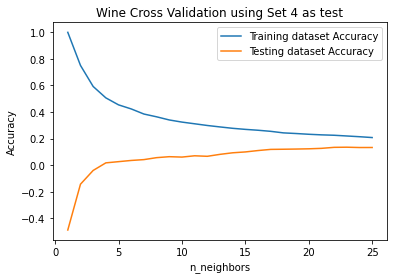

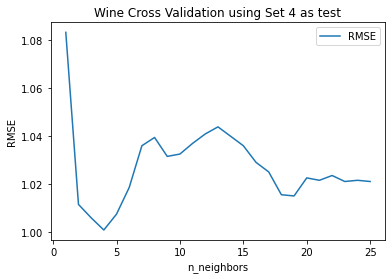

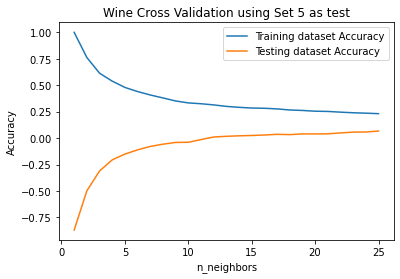

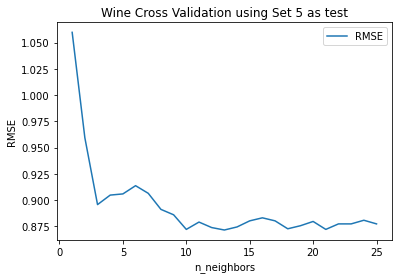

In [5]:
#Produce Wine dataframes to prep for cross validation checking

#Train 2-3-4-5, Test 1
x_wtrain1 = pd.concat([xWine2, xWine3, xWine4, xWine5])
y_wtrain1 = pd.concat([yWine2, yWine3, yWine4, yWine5])

x_wtest1 = xWine1
y_wtest1 = yWine1

#Train 1-3-4-5, Test 2
x_wtrain2 = pd.concat([xWine1, xWine3, xWine4, xWine5])
y_wtrain2 = pd.concat([yWine1, yWine3, yWine4, yWine5])

x_wtest2 = xWine2
y_wtest2 = yWine2


#Train 1-2-4-5, Test 3
x_wtrain3 = pd.concat([xWine1, xWine2, xWine4, xWine5])
y_wtrain3 = pd.concat([yWine1, yWine2, yWine4, yWine5])

x_wtest3 = xWine3
y_wtest3 = yWine3


#Train 1-2-3-5, Test 4
x_wtrain4 = pd.concat([xWine1, xWine2, xWine3, xWine5])
y_wtrain4 = pd.concat([yWine1, yWine2, yWine3, yWine5])

x_wtest4 = xWine4
y_wtest4 = yWine4

#Train 1-2-3-4, Test 5
x_wtrain5 = pd.concat([xWine1, xWine2, xWine3, xWine4])
y_wtrain5 = pd.concat([yWine1, yWine2, yWine3, yWine4])

x_wtest5 = xWine5
y_wtest5 = yWine5

#Used split dataframes to train, the test respectively each time for every fold
#KNN analysis using training error/testing error + RMSE to produce graphs



nfolds = 5

train_accuracy = []
test_accuracy = []
RMSE = []

for a in range(0, nfolds):
    train_accuracy2 = []
    train_accuracy.append(train_accuracy2)

for b in range(0, nfolds):
    test_accuracy2 = []
    test_accuracy.append(test_accuracy2)

for c in range(0, nfolds):
    RMSE2 = []
    RMSE.append(RMSE2)
    
    
#will evaluate accuracy from 1 - 25 neighbors
neighbors = np.arange(1, 26)
for i in range(1, nfolds + 1):
    xTrainDigits = globals()[f"x_wtrain{i}"]
    xTestDigits = globals()[f"x_wtest{i}"]

    yTrainDigits = globals()[f"y_wtrain{i}"]
    yTestDigits = globals()[f"y_wtest{i}"]
    
    
    for j, k in enumerate(neighbors):
        knn = KNeighborsRegressor(n_neighbors = k, weights = 'uniform', metric = 'euclidean')
        knn.fit(xTrainDigits, yTrainDigits.values.reshape(-1))
        y_predict = knn.predict(xTestDigits).astype(int)
        
         # Compute & store training and test data accuracies.
        train_accuracy_temp = knn.score(xTrainDigits, yTrainDigits)
        train_accuracy[i-1].append(train_accuracy_temp)

        test_accuracy_temp = knn.score(xTestDigits, yTestDigits)
        test_accuracy[i-1].append(test_accuracy_temp)

        # Compute & store RMSE (root mean squared error) values.
        RMSE_temp = np.sqrt(mean_squared_error(yTestDigits, y_predict))
        RMSE[i-1].append(RMSE_temp)
        

    # Generate plots to evaluate appropriate number 'K' neighbors.
    plt.plot(neighbors, train_accuracy[i-1], label = 'Training dataset Accuracy')
    plt.plot(neighbors, test_accuracy[i-1], label = 'Testing dataset Accuracy')
    plt.legend()
    plt.title(f"Wine Cross Validation using Set {i} as test")
    plt.xlabel('n_neighbors')
    plt.ylabel('Accuracy')
    plt.show()

    plt.plot(neighbors, RMSE[i-1], label = 'RMSE')
    plt.legend()
    plt.title(f"Wine Cross Validation using Set {i} as test")
    plt.xlabel('n_neighbors')
    plt.ylabel('RMSE')
    plt.show()
        